# Getting Started

In [38]:
# import sys
import csv
import pandas as pd

DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'house-prices.csv'


#--
# MAIN
#--

#-get data from a file
try:
    df = pd.read_csv( DATA_DIR + DATA_FILE, na_filter=False )
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
#-get and size of raw data set
N = len( df.columns )
M = len( df.values )

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))
print(df.values)
print(df["Price"][3])
df.values[3][1]

[[1 114300 1790 ... 2 'No' 'East']
 [2 114200 2030 ... 3 'No' 'East']
 [3 114800 1740 ... 1 'No' 'East']
 ...
 [126 113500 2070 ... 2 'No' 'North']
 [127 149900 2020 ... 1 'No' 'West']
 [128 124600 2250 ... 4 'No' 'North']]
94700


94700

# Build a Distance Matrix

In [59]:
import sys
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

def dist_square( v0, v1 ):
    d = math.pow(v0-v1,2)
    return d

def dist_nominal( v0, v1 ):
    if ( v0 == v1 ):
        d = 0.0
    else:
        d = 1.0
    return d

def dist_instance_euclidean( df, X0, X1 ):
    N = len(df.columns)
    d = 0.0
    for i in range(1,N):
        if(df.dtypes[i] == 'object'):
            d += dist_nominal(df.values[X0][i],df.values[X1][i])
        else:
            d += dist_square(df.values[X0][i],df.values[X1][i])
    d = math.sqrt( d )
    return d

def dist_instance_manhattan(df,X0,X1):
    N = len(df.columns)
    d= 0.0
    for i in range(1,N):
        if(df.dtypes[i] == 'object'):
            d += dist_nominal(df.values[X0][i],df.values[X1][i])
        else:
            d += abs(df.values[X0][i] - df.values[X1][i])
    return d

In [62]:
#-compute distances between instances
dist_mesh_euclidean = np.zeros((M,M))
dist_mesh_manhattan = np.zeros((M,M))
for i in range(M):
    for j in range(i+1,M):
        dist_mesh_euclidean[i][j] = dist_instance_euclidean(df,i,j)
        dist_mesh_euclidean[j][i] = dist_mesh_euclidean[i][j] 
        dist_mesh_manhattan[i][j] = dist_instance_manhattan(df,i,j)
        dist_mesh_manhattan[j][i] = dist_mesh_manhattan[i][j]
print('Euclidean: mean distance = {} ({}), minimum distance = {}, maximum distance = {}'.format( np.mean( dist_mesh_euclidean ), np.std( dist_mesh_euclidean ), np.min( dist_mesh_euclidean ), np.max( dist_mesh_euclidean )))
print('Manhattan: mean distance = {} ({}), minimum distance = {}, maximum distance = {}'.format( np.mean( dist_mesh_manhattan ), np.std( dist_mesh_manhattan ), np.min( dist_mesh_manhattan ), np.max( dist_mesh_manhattan )))

Euclidean: mean distance = 30055.349130814982 (23007.526884197912), minimum distance = 0.0, maximum distance = 142102.4827615619
Manhattan: mean distance = 30291.340942382812 (23057.33673526354), minimum distance = 0.0, maximum distance = 142945.0


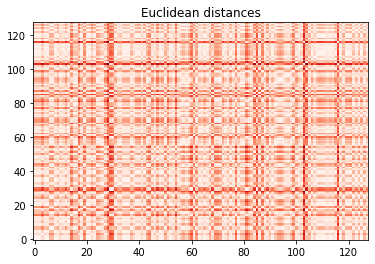

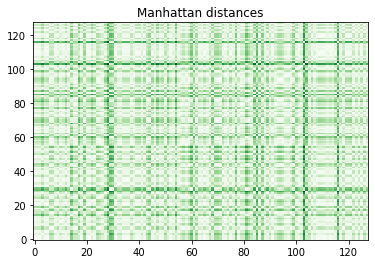

In [78]:
x0_range = np.arange(M)
x1_range = np.arange(M)
x0_mesh, x1_mesh = np.meshgrid( x0_range, x1_range )

plt.figure()
plt.set_cmap( 'Reds' )
plt.pcolormesh( x0_mesh, x1_mesh, dist_mesh_euclidean, shading='auto' )
plt.title( 'Euclidean distances' )

plt.show()
plt.close()

x0 = np.arange(M)
x1 = np.arange(M)
x0_mesh, x1_mesh = np.meshgrid(x0_range,x1_range)

plt.figure()
plt.set_cmap("Greens")
plt.pcolormesh(x0_mesh,x1_mesh,dist_mesh_manhattan,shading="auto")
plt.title("Manhattan distances")
plt.show()
plt.close()